<a href="https://colab.research.google.com/gist/electrolunch/d14e0dfb311e3551dd103323d32970c1/opa177_noise_2-ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Расчет шума для opa177 в неинвертирующем включении**

<img src="https://drive.google.com/uc?export=view&id=1-73SpQ0fhSnAjR702grpxTEkXocCNvWz" width="300" alt="Circuit"> &nbsp; <img src="https://drive.google.com/uc?export=view&id=1u3E-_9jFY7tPZt_SNX_BK1YQ_TwV26Ay " alt="datasheet" width="300">

In [1]:
pip install matplotlib sympy numpy


\begin{align*}
\log{e_n} &= A \log{f} + \log{B} \\
\log{e_1} &= A \log{f_1} + \log{B} \\
\log{B} &= \log{e_1} - A \log{f_1} \\
\log{e_2} &= A \log{f_2} + \log{B} \\
\log{e_2} &= A \log{f_2} + \log{e_1} - A \log{f_1}
\end{align*}


\begin{align*}
\left(\frac{f_2}{f_1}\right)^A &= \frac{e_2}{e_1}\\
\\
\end{align*}

\begin{align*}
A = (log{e_2} - log{e_1}) / (log{f_2} - log{f_1})\\\\
\log{B} = \frac{\log{e_1} \cdot \log{f_2} - \log{e_2} \cdot \log{f_1}}{\log{f_2} - \log{f_1}}
\end{align*}

500


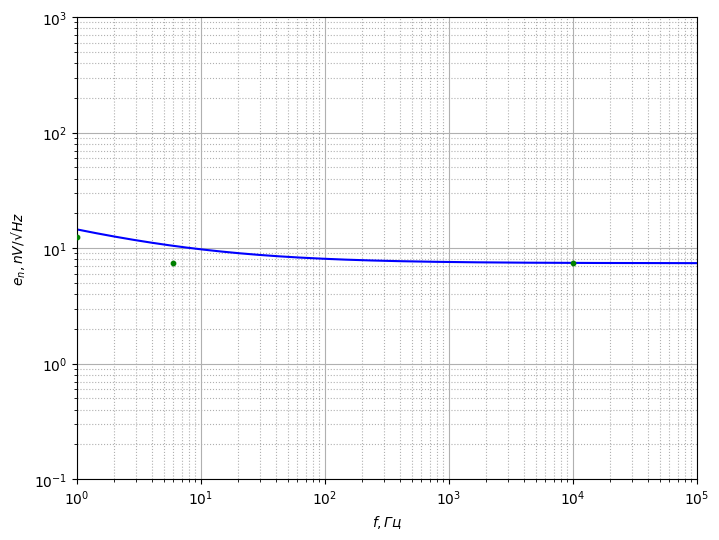

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import log,exp

# # Решим уравнение с помощью sympy
# import sympy as sp

# # Определим переменные
# A, B, e1_, e2_,f1_,f2_ = sp.symbols('A B e1 e2 f1 f2')

# A = (sp.log(e2_) - sp.log(e1_)) / (sp.log(f2_) - sp.log(f1_))

# B = sp.exp((sp.log(e1_) * sp.log(f2_) - sp.log(e2_) * sp.log(f1_)) / (sp.log(f2_) - sp.log(f1_)))

# print('A =', A)
# # A
# print('B =', B)


# Нарисуем график
f = np.logspace(0, 5, 500)
e1 = 12.5e-9
e2 = 7.4e-9
f1 = 1
f2 = 6

A = (np.log10(e2) - np.log10(e1)) / (np.log10(f2) - np.log10(f1))
B = 10**(np.log10(e1) - A * np.log10(f1))

efl = B * f**A

ew = e2

en=np.sqrt(efl**2+ew**2)

print(len(f))


# B

plt.figure(figsize=(8, 6))
plt.loglog(f, en*1e9, label='e(f)', color='blue')

plt.scatter([f1, f2, 1e4], [e1*1e9, e2*1e9, e2*1e9], color='green', zorder=4, s=10)

# plt.text(f1, e1*1e9, '$(f_1, e_1)$', fontsize=12, ha='left')
# plt.text(f2, e2*1e9, '$(f_2, e_2)$', fontsize=12, ha='left')
plt.xlabel(r'$f, Гц$')
plt.ylabel(r'$e_n, nV/√Hz$')
# plt.legend()
plt.grid(True)
plt.grid(which='minor', linestyle=':')
plt.xlim(1, 1e5)
plt.ylim(1e-1, 1e3)
plt.show()

500


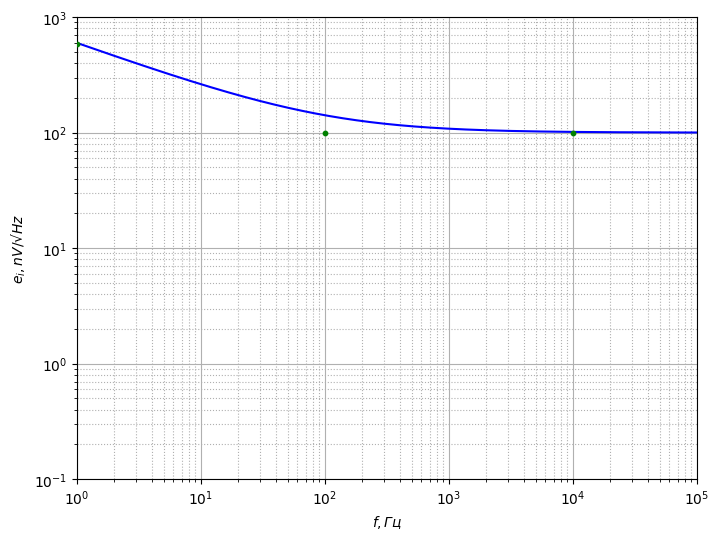

In [35]:
f = np.logspace(0, 5, 500)
e3 = 590e-9
e4 = 100e-9
f3 = 1
f4 = 100

A = (np.log10(e4) - np.log10(e3)) / (np.log10(f4) - np.log10(f3))
B = 10**(np.log10(e3) - A * np.log10(f3))

efl = B * f**A

ew = e4

ei=np.sqrt(efl**2+ew**2)

print(len(f))


# B

plt.figure(figsize=(8, 6))
plt.loglog(f, ei*1e9, label='e(f)', color='blue')

plt.scatter([f3, f4, 1e4], [e3*1e9, e4*1e9, e4*1e9], color='green', zorder=4, s=10)

# plt.text(f3, e3*1e9, '$(f_1, e_1)$', fontsize=12, ha='left')
# plt.text(f4, e4*1e9, '$(f_2, e_2)$', fontsize=12, ha='left')
plt.xlabel(r'$f, Гц$')
plt.ylabel(r'$e_i, nV/√Hz$')
# plt.legend()
plt.grid(True)
plt.grid(which='minor', linestyle=':')
plt.xlim(1, 1e5)
plt.ylim(1e-1, 1e3)
plt.show()

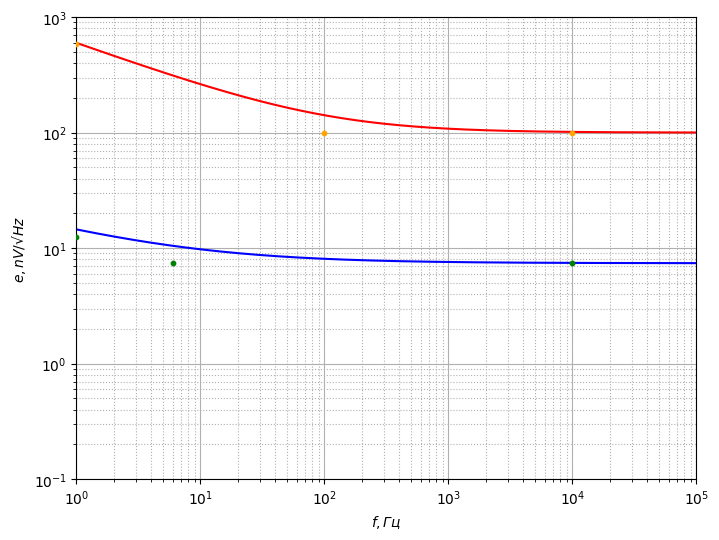

In [36]:
plt.figure(figsize=(8, 6))

# First plot
plt.loglog(f, en*1e9, label='e_n(f)', color='blue')
plt.scatter([f1, f2, 1e4], [e1*1e9, e2*1e9, e2*1e9], color='green', zorder=4, s=10)

# Second plot
plt.loglog(f, ei*1e9, label='e_i(f)', color='red')
plt.scatter([f3, f4, 1e4], [e3*1e9, e4*1e9, e4*1e9], color='orange', zorder=4, s=10)

plt.xlabel(r'$f, Гц$')
plt.ylabel(r'$e, nV/√Hz$')
plt.grid(True)
plt.grid(which='minor', linestyle=':')
plt.xlim(1, 1e5)
plt.ylim(1e-1, 1e3)

# Uncomment this if you want to show a legend
# plt.legend()

plt.show()